## 데이터 생성

In [1]:
import numpy as np

In [5]:
# uniform : 0~1 사이의 난수
real_X = np.random.uniform(size=100)
real_X

array([0.93401422, 0.23178159, 0.62123324, 0.10608347, 0.06529152,
       0.51019645, 0.29187194, 0.43735552, 0.69200902, 0.99467129,
       0.14506474, 0.46636556, 0.43297236, 0.9029986 , 0.33519299,
       0.79465828, 0.99893655, 0.93705972, 0.22262036, 0.83740038,
       0.22359299, 0.87744937, 0.77255023, 0.90862018, 0.75188667,
       0.31843641, 0.29488342, 0.05639378, 0.87471779, 0.07567346,
       0.33040756, 0.86186245, 0.58511235, 0.13202059, 0.41076466,
       0.00453007, 0.62972184, 0.697405  , 0.95446722, 0.9631561 ,
       0.97801427, 0.16985887, 0.60437051, 0.33585576, 0.63648712,
       0.78831791, 0.8054473 , 0.65209471, 0.92412359, 0.77764716,
       0.57570924, 0.08345017, 0.08105202, 0.41913295, 0.65964206,
       0.61919276, 0.07483731, 0.08982489, 0.35951985, 0.32696308,
       0.80899968, 0.11942855, 0.64879284, 0.88164679, 0.41340282,
       0.06229102, 0.01692758, 0.02865823, 0.55097904, 0.10014742,
       0.25925867, 0.17862057, 0.13976475, 0.50199874, 0.37440

In [6]:
real_y = np.sin(2*np.pi*real_X) + 0.15*np.random.normal(0.01, size=100) # 임의로 세운 식

In [7]:
import matplotlib.pyplot as plt

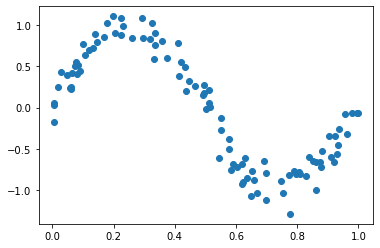

In [9]:
plt.scatter(real_X, real_y)
# 실제 데이터로 설정

In [10]:
import pandas as pd
df = pd.DataFrame(np.column_stack((real_X,real_y)))
df.columns=['X','y']
df

,X,y
0,0.934014,-0.458188
1,0.231782,0.985847
2,0.621233,-0.905536
3,0.106083,0.632247
4,0.065292,0.421476
...,...,...
95,0.920695,-0.663882
96,0.046071,0.397638
97,0.591143,-0.684444
98,0.576851,-0.508457


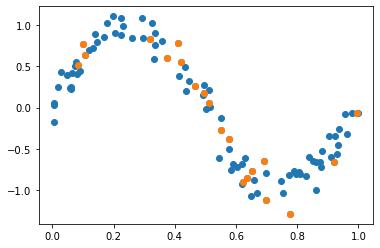

In [12]:
sample=df.sample(20) # observation 중에 20개를 무작위로 추출
plt.scatter(real_X, real_y)
plt.scatter(sample['X'], sample['y'])

In [13]:
sample = sample.sort_values(by=['X'])
X=sample['X']
y=sample['y']

In [16]:
X

51    0.083450
69    0.100147
3     0.106083
25    0.318436
74    0.374406
34    0.410765
53    0.419133
11    0.466366
92    0.494318
81    0.512781
99    0.551398
50    0.575709
2     0.621233
44    0.636487
47    0.652095
8     0.692009
37    0.697405
49    0.777647
95    0.920695
9     0.994671
Name: X, dtype: float64

## 1차회귀

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [18]:
X=np.array(X).reshape(-1,1) # 1차원 벡터인 경우 2차원 벡터로 reshape 필요
reg.fit(X,y)

LinearRegression()

In [19]:
y_pred = reg.predict(X)

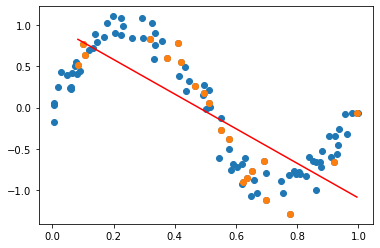

In [20]:
plt.scatter(real_X, real_y)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red') # 1차 회귀식

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
mean_squared_error(y, y_pred)

0.2048971071795526

In [23]:
r2_score(y, y_pred)

0.5600852951643249

## 2차항이 포함된 식으로 변경하기

In [25]:
from sklearn.preprocessing import PolynomialFeatures # PolynomialFeatures : 주어진 데이터에 n차 제곱항을 제공 
poly = PolynomialFeatures(degree=2,include_bias=False) # degree : 차수 설정
X_2=poly.fit_transform(X)
X_2

array([[0.08345017, 0.00696393],
       [0.10014742, 0.01002951],
       [0.10608347, 0.0112537 ],
       [0.31843641, 0.10140175],
       [0.37440551, 0.14017948],
       [0.41076466, 0.1687276 ],
       [0.41913295, 0.17567243],
       [0.46636556, 0.21749683],
       [0.49431817, 0.24435046],
       [0.51278068, 0.26294403],
       [0.55139757, 0.30403928],
       [0.57570924, 0.33144113],
       [0.62123324, 0.38593073],
       [0.63648712, 0.40511585],
       [0.65209471, 0.42522751],
       [0.69200902, 0.47887649],
       [0.697405  , 0.48637373],
       [0.77764716, 0.6047351 ],
       [0.92069504, 0.84767935],
       [0.99467129, 0.98937098]])

In [26]:
reg.fit(X_2, y)

LinearRegression()

In [28]:
y_pred = reg.predict(X_2) # 2차항이 포함된 데이터로 예측

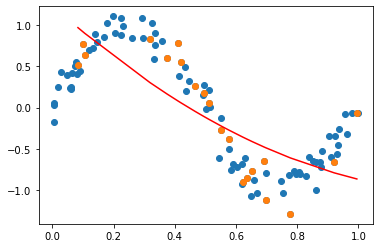

In [29]:
plt.scatter(real_X, real_y)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red') # 2차 회귀식

In [30]:
mean_squared_error(y, y_pred)

0.19676023069701368

## 3차식

In [31]:
poly = PolynomialFeatures(degree=3,include_bias=False)
X_temp=poly.fit_transform(X)

In [32]:
reg.fit(X_temp,y)
y_pred = reg.predict(X_temp)

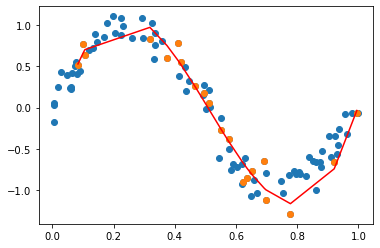

In [33]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

In [34]:
mean_squared_error(y,y_pred)

0.016833448401862315

## 8차식

In [37]:
poly = PolynomialFeatures(degree=8,include_bias=False)
X_temp = poly.fit_transform(X)


In [38]:
reg.fit(X_temp,y)
y_pred=reg.predict(X_temp)

In [39]:
mean_squared_error(y,y_pred)

0.013076112604236526

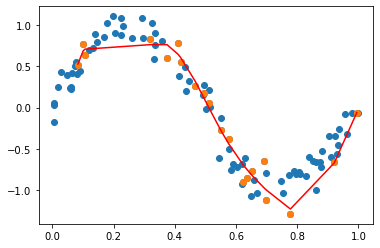

In [40]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

## 10차식

In [45]:
poly = PolynomialFeatures(degree=10, include_bias=False)
X_temp=poly.fit_transform(X)
reg.fit(X_temp,y)
y_pred=reg.predict(X_temp)
mean_squared_error(y,y_pred)

0.010213806525663642

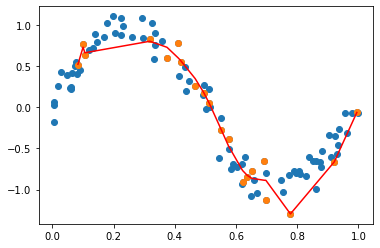

In [46]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

## 유연성이 좋은 모델이 반드시 좋은가?

In [47]:
true_mse = []
train_mse = []
for i in range(1,8): # 1차식부터 7차식까지
    # 데이터 샘플 추출
    sample=df.sample(20)
    sample=sample.sort_values(by=['X'])
    X=sample['X']
    y=sample['y']
    # 샘플 데이터로 학습
    X=np.array(X).reshape(-1,1)    
    poly = PolynomialFeatures(degree=i,include_bias=False)
    X_temp = poly.fit_transform(X)
    reg.fit(X_temp,y)
    # 학습된 샘플 데이터로 예측
    y_pred=reg.predict(X_temp)
    # 학습된 데이터를 얼마나 잘 맞추는지 측정
    train_mse.append(mean_squared_error(y,y_pred))
    # 실제 전체 데이터로 예측, 정확도 측정
    real_X_transformed =  poly.fit_transform(real_X.reshape(-1,1))
    true_mse.append(mean_squared_error(real_y,reg.predict(real_X_transformed)))

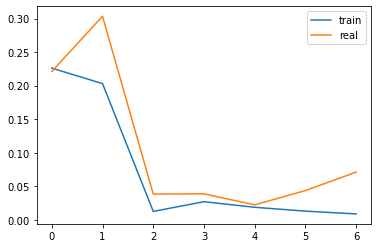

In [48]:
plt.plot(train_mse,label='train')
plt.plot(true_mse,label='real')
plt.legend()